# Hey There!
Please find this notebook as a tool to further train your a 3D-UNet model, and to make inferences on the KiTS-2023 dataset.

We'll detail the steps as we go through! If there's something we missed or you need a little extra assistance, please use the following link to send you to the nn-UNet official repository: https://github.com/MIC-DKFZ/nnUNet.

If you simply would like to make inferences using the model we have built (it can be improved with time and computational resources), simply skip to the "Making Inferences" section, after running the code up to and including the "Set Environment Parameters" section.

If else, please follow through all the way to further train the model from scratch which will serve you greater.

Wishing you the best! Thank you once again for the incredible opportunity.

RMIT Team:
- Frederick Amad
- Zekiye Yildirim
- Aleisha Dillion
- Ei Thiri Lwin
- Mario Djameh

# Pip Install Dependencies
Unfortunately because we're using a Google Virtual Machine, the enviornment resets specific libraries, so you'll have to run the following block to pip install the necessary libraries.

In [ ]:
# Bachgenerators is a library dependency for nnUNet
!pip3 install batchgenerators

# The crux of the model training and inferrence machine
!pip3 install nnunetv2

# If you would like to output the neural network architecture, you'll need
# to pip install the following
!pip3 install --upgrade git+https://github.com/FabianIsensee/hiddenlayer.git

# !NOTE: It may ask to restart the 'run-time connection', you can ignore this!

# Import Libraries

Import the necessary libraries to make the magic happen.

In [ ]:
"""
Import 'drive' to connect to your google drive which
allows for a place  to clone the required repositories.
"""
from google.colab import drive

# import nnunetv2
# import batchgenerators

import torch

"""
Un-comment the following if you have chosen to
output the neural network architecture.
"""
# import hiddenlayer

import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

## Establish whether you're connected to a GPU.

In [ ]:
torch.cuda.is_available()

False

In [ ]:
!nvidia-smi

Fri Oct 13 04:31:04 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Drive Mount
This will mount the Google Drive workspace for further development of the training and to make inferences.

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Kits23 Full Dataset
The dataset we used for training contains 150 cases due to the limited RAM allowance.

Should you want to further the model (which I think you may want to do), please clone the repository below and install the full dataset. The link to this official repository can be found here: https://github.com/neheller/kits23. It contains close to 500 cases. Installation instructions are within the page's readme.md.

NOTE: Ensure that you've set your current working directory prior to running the code-block.

In [ ]:
os.chdir("INPUT YOUR DIRECTORY PATH TO CLONE THE KiTS-23 REPOSITORY FOR FURTHER TRAINING")

In [ ]:
# !git clone https://github.com/neheller/kits23
# os.chdir("/content/drive/MyDrive/kits23")
# !pip3 install -e .
# !kits23_download_data

# Clone our GitHub Repository to Establish Mandatory nn-UNet Directory Structure
The nn-UNet framework requires a very specific directory structure. We have already taken the liberty to set this structure up for you. However, you will need to populate it with your data (too large to store on GitHub). If you require a full rundown, you can see the following: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/dataset_format.md.

There exists a code block below titled "Automate Directories for KiTS23 in nnUNet Framework" which will automate the conversion of the dataset into the required format for the nnUNet to work.

## A Quick Directory Rundown:
- nnUNet_preprocessed:
  - A place that stores your preprocessed data
- nnUNet_raw --> nnUNet_raw_data:
  - A place to store your dataset (i.e. the KiTS-23 dataset).
  - Note: You can further expand this to other datasets (e.g. Brain Tumour Segmentation Dataset [BRaTS]).
  - Note: Every dataset has a very specific ID, you may notice that the KiTS23 dataset has been allocated ID: 220.

  - --> imagesTr (Training Directory):
    - Place your training data here.
    - Note: The .nii.gz files require the following format:
      - case_0000X_0000.nii.gz
  - --> imagesTs (Testing Directory):
    - A place to store your testing data.
    - Note: Same format for training is needed for testing.
  - --> labelsTr (Training Label Directory):
    - Place to store your associated case labels.
    - Note: The .nii.gz files require the following format:
      - case_0000X.nii.gz
- nnUNet_trained_models:
  - The nnUNet framework stores weights and training checkpoints with additional information.
  - Note: 1 fold (fold_0) has been initiated. nnUNet allows up to 5 folds per task, allowing for an ensemble of models to make inferences.

We have however given you the neural network weights for the first 50 epochs found under:

nnUNetFrame:
- dataset:
  - nnUNet_trained_models:
    - Dataset220_KiTS2023:
      - nUNetTrainer__nnUNetPlans__3d_fullres:
        - fold_0

NOTE: If the training weights are not there, please contact us, we will have to send it to you (large file).

NOTE: The current dataset.json file has 150 cases as a training number, you can change this manually or allow the automated dataset conversion function to this for you.

In [ ]:
!git clone https://github.com/Zekiye-Y/capstone-project

Cloning into 'capstone-project'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 135 (delta 48), reused 106 (delta 29), pack-reused 0
Receiving objects: 100% (135/135), 6.34 MiB | 15.88 MiB/s, done.
Resolving deltas: 100% (48/48), done.


# Clone the nnUNet Official Repository
Here you need to download the official repository to get access to the python scripts. Please see here for further information:
https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/installation_instructions.md.

In [ ]:
"""Note: You may need to change the directory to where the nnUNetFrame is located."""
# os.chdir("/content/capstone-project/nnUNetFrame")

# !git clone https://github.com/MIC-DKFZ/nnUNet.git
# !cd nnUNet
# !pip install -e .

# Set Environment Parameters
nnUNet requires the setting of specific environment variables.

NOTE: You may need to set the directory to each of the following folders:
1. nnUNet_raw = nnUNet_raw_data directory
2. nnUNet_preprocessed = nnUNet_preprocessed directory
3. nnUNet_results = nnUNet_trained_models directory

This should be easy to follow since the data structure has already been set up for you.

If you're running this outside of Google Colab, please see the following documentation: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/set_environment_variables.md.

In [ ]:
os.environ['nnUNet_raw'] = "/content/drive/MyDrive/nnUNetFrame/dataset/nnUNet_raw/nnUNet_raw_data"
os.environ['nnUNet_preprocessed'] = "/content/drive/MyDrive/nnUNetFrame/dataset/nnUNet_preprocessed"
os.environ["nnUNet_results"] = "/content/drive/MyDrive/nnUNetFrame/dataset/nnUNet_trained_models"

# Automate Directories for Kits23 in nn-UNet Framework
Use the follow code block to convert the official KiTS-23 dataset into the required format nnUNet requires.

You can find the required python file by following the directory structure below:

nnUNetFrame:
- nnUNet
  - nnUNetV2
    - dataset_conversion
      - Dataset220_KiTS2023.py

In [ ]:
# Note: You may have to change the directory (you're probably sick of me saying this lol)

# !python3 "/content/drive/MyDrive/nnUNetFrame/nnUNet/nnunetv2/dataset_conversion/Dataset220_KiTS2023.py" "/content/drive/MyDrive/kits23/dataset"

# Verify Correct Placement of Files

In [ ]:
train_image_dir = "/content/drive/MyDrive/nnUNetFrame/dataset/nnUNet_raw/nnUNet_raw_data/Dataset220_KiTS2023/imagesTr"
train_label_dir = "/content/drive/MyDrive/nnUNetFrame/dataset/nnUNet_raw/nnUNet_raw_data/Dataset220_KiTS2023/labelsTr"
train_files = os.listdir(train_image_dir)
label_files = os.listdir(train_label_dir)
print("train image files:", len(train_files))
print("train label files:", len(label_files))

# Verify Dataset Integrity + Obtain Dataset Fingerprint + Plan of Execution

nnUNet comes with a function to verify that the folder structures has been correctly set up and that the cases have been correctly formatted.

Additionally, it will take a 'finger-print' of the dataset that analyses various metrics of the dataset that influences the plans and types of preprocessing required.

Please use '-h' after the following commands to get more information on the arguments allowed:

- nnUNetv2_plan_and_preprocess
- nnUNetv2_extract_fingerprint
- nnUNetv2_plan_experiment
- nnUNetv2_preprocess

Note: You can choose 4 different types of configurations, these include:
- 2d
- 3d_fullres
- 3d_lowres
- 3d_cascade_fullres (pairs low-resolution with a high-resolution neural network)

If you require more information, please see the following link: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/how_to_use_nnunet.md#experiment-planning-and-preprocessing

In [ ]:
os.chdir("/content/drive/MyDrive/nnUNetFrame/nnUNet/nnunetv2/experiment_planning")

In [ ]:
!nnUNetv2_plan_and_preprocess -d 220 --verify_dataset_integrity

## If you would like to do this on step level, you can run the following commands in order:

In [ ]:
# !nnUNetv2_extract_fingerprint -d 220 --verify_dataset_integrity

Dataset220_KiTS2023
Using <class 'nnunetv2.imageio.nibabel_reader_writer.NibabelIOWithReorient'> reader/writer

####################
verify_dataset_integrity Done. 
If you didn't see any error messages then your dataset is most likely OK!
####################



In [ ]:
# !nnUNetv2_plan_experiment -d 220 -c 3d_fullres

In [ ]:
# !nnUNetv2_preprocess -d 220 -plans_name nnUNetPlans -c 3d_fullres -np 2

Preprocessing dataset Dataset220_KiTS2023
Configuration: 3d_fullres...
100% 489/489 [4:00:24<00:00, 29.50s/it]


# Training 3D-Full-Res Model

Here we used a 3D Full Resolution model.

Please use "!nnUNetv2_train -h" to see the allowed arguments.

Note that the default number of epochs is 1000!! We tried to reduce this but we were unsuccessful. There's a folder that contains variants, found:

nnUNet:
- nnUNetv2:
  - training:
    - nnUNetTrainer:
      - variants:
        - training_length

You may be successful in finding a way to reduce the number of epochs. I (Freddy) suspect that you may have to replace "nnUNetv2_train" with one of the python scripts in the file. Tried but was unsuccessful.

Further information can be found here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/how_to_use_nnunet.md#model-training.

To ensure you're using the GPU for training, please use the following snippet at the start of the command:
- CUDA_VISIBLE_DEVICES = 0

If you're lucky enough to have multiple GPU's, please see the following documentation: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/how_to_use_nnunet.md#using-multiple-gpus-for-training.

In [ ]:
os.chdir("/content/drive/MyDrive/nnUNetFrame/nnUNet/nnunetv2/training")

In [ ]:
!nnUNetv2_train -h

In [ ]:
!CUDA_VISIBLE_DEVICES=0 nnUNetv2_train 220 3d_fullres 0 -num_gpus 1 -device 'cuda' --npz

# Making Inferences

Here we make inferences with testing images that have been placed in our 'imagesTs' directory (yes, rememeber that from way up there?).

You can use the following command line to find the best configurations which will output a command line to further make inferences:
- !nnUNetv2_find_best_configuration

However, for this to be successful you will have to have had to train the model for a very very long time (default = 1000 epochs).

Instead, you can use the following command line to run inferences on the model you currently have (we had to stop early and use the 'checkpoint_best.pth' as the 'checkpoint_final.pth', found in the 'nnUNet_trained_models --> fold_0 directory):

!nnUNetv2_predict -i [input_folder] -o [output_folder] -d [dataset_name_or_id] -c [configuration] --save_probabilities

For further information, please see the following link: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/how_to_use_nnunet.md#run-prediction.


In [ ]:
os.chdir(os.path.join("/content/drive/MyDrive/nnUNetFrame/nnUNet/nnunetv2/inference"))

In [ ]:
!nnUNetv2_predict -h

In [ ]:
!nnUNetv2_predict -i "/content/drive/MyDrive/nnUNetFrame/dataset/nnUNet_raw/nnUNet_raw_data/Dataset220_KiTS2023/imagesTs/" -o "/content/drive/MyDrive/nnUNetFrame/dataset/nnUNet_raw/nnUNet_raw_data/Dataset220_KiTS2023/predictions/" -d 220 -c 3d_fullres -f 0 --save_probabilities

# Visualize Predictions

Depending on where you directed your 'output_folder' above, you should have .nii.gz files with the predicted segmentations.

These can be quickly visualised here.

Note: You may not have the case shown below, but the process is the same nonetheless.


In [ ]:
seg_file = nib.load("/content/drive/MyDrive/nnUNetFrame/dataset/nnUNet_raw/nnUNet_raw_data/Dataset220_KiTS2023/imagesTs/case_00560_0000.nii.gz").get_fdata()

In [ ]:
seg_file.shape

(484, 512, 512)

In [ ]:
pred_file = nib.load("/content/drive/MyDrive/nnUNetFrame/dataset/nnUNet_raw/nnUNet_raw_data/Dataset220_KiTS2023/predictions/case_00560.nii.gz").get_fdata()

In [ ]:
pred_file.shape

(484, 512, 512)

In [ ]:
np.unique(pred_file)

array([0., 1., 2., 3.])

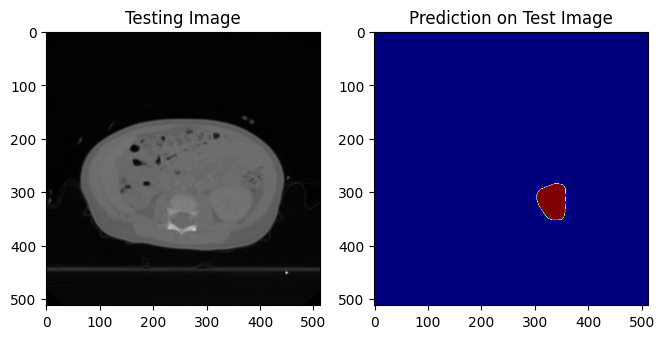

In [ ]:
n_slice = 65
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(seg_file[n_slice,:,:], cmap='gray')
plt.subplot(232)
plt.title('Prediction on Test Image')
plt.imshow(pred_file[n_slice,:,:], cmap= "jet")
plt.show()

# NEXT STEPS!

Congratulations on making it thus far!!

From here, you can take the predictions located in your 'output_folder' (.nii.gz files) and load them into MANGO (Multi-image Analysis GUI - https://mangoviewer.com/) which will allow you to overlap it with the original CT scan. Further, you will be able to use the full 3D arena to pan, rotate and slice your segmentations.

We had hopes to create a full solution which will automate the transfer of predictions to a graphical user interface. However, due to time constraints this was abandoned.

---

You're probably thinking: "damn, that's pretty easy, what did these kids do for 7 weeks?"

We cried... that's what we did... we cried together in the corner of the cyber security room in building 14...

We unforunately had to use this framework as a backup after our attempt to build a neural network from scratch had hit some major hurdles. You can see how far we got by using this link: https://github.com/Zekiye-Y/capstone-project/blob/main/Official_Capstone_Notebook.ipynb.

We thank you again and hope you appreciate our effort in making this task a reality!



# Recommended Improvements

We recommend the following to improve the output of the model:
- Increase training size (currently at 150)
- Train the model with multiple folds (currently 1, fold_0)
  - You can use an ensemble of neural networks to make a prediction
- Create an automated pipeline which will take the predictions and display it in a graphical user interface